# PyTorch Geometric Tutorial
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch_geometric.datasets as datasets
import torch_geometric.transforms as transforms
import torch_geometric.data as data
import networkx as nx
from torch_geometric.utils import to_networkx

## Data handling basics

In [2]:
# Initial graph features (100 nodes, with 16 features each)
embeddings = torch.rand((100,16), dtype=torch.float)

In [12]:
# Creating the graph
rows = np.array(np.random.choice(np.arange(100), 500)) # 100 random source nodes, 500 edges
cols = np.array(np.random.choice(np.arange(100), 500)) # 100 random target nodes, 500 edges
edges = torch.tensor([rows, cols]) # 2x500 tensor

In [4]:
# Create edges attributes
edges_attr = np.random.choice(np.arange(3), 500) # 500 random edge attributes with 3 possible values

In [5]:
# Create node classificaiton labels
ys = torch.rand((100)).round().long() # 100 random labels (0 or 1)

In [6]:
# Convert to PyTorch Geometric data object
graph = data.Data(x=embeddings, edge_index=edges, edge_attr=edges_attr, y=ys)
graph

Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])

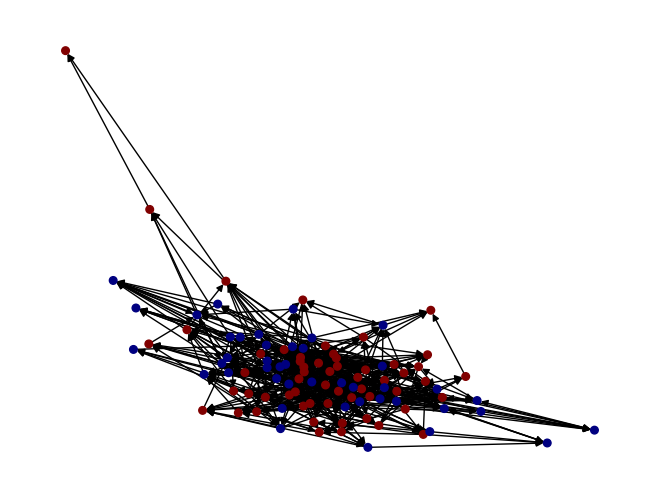

In [7]:
# Plot the graph

vis = to_networkx(graph)

node_labels = graph.y.numpy()

nx.draw(vis, node_color=node_labels, cmap=plt.cm.jet, node_size=30, font_size=8, with_labels=False)

### Batch

In [8]:
graph2 = graph.clone()

In [9]:
batch = data.Batch.from_data_list([graph, graph2])

In [10]:
print('Number of graphs in the batch: ', batch.num_graphs)
print('Number of nodes in the batch: ', batch.num_nodes)
print('Number of edges in the batch: ', batch.num_edges)
print('Number of node features in the batch: ', batch.num_node_features)
print('Number of edge features in the batch: ', batch.num_edge_features) # 0 because graphs are disconnected
print('Number of edge features in graph 1: ', batch[0].num_edge_features)
print('Number of edge features in graph 2: ', batch[1].num_edge_features)

Number of graphs in the batch:  2
Number of nodes in the batch:  200
Number of edges in the batch:  1000
Number of node features in the batch:  16
Number of edge features in the batch:  0
Number of edge features in graph 1:  1
Number of edge features in graph 2:  1


### Cluster

### Neighbor sampler

## Datasets basics

- InMomeryDataset: light datasets that fits in your RAM
- Dataset: larger datasets

In [13]:
name = 'Cora'
transform = transforms.Compose

['KarateClub',
 'TUDataset',
 'GNNBenchmarkDataset',
 'Planetoid',
 'FakeDataset',
 'FakeHeteroDataset',
 'NELL',
 'CitationFull',
 'CoraFull',
 'Coauthor',
 'Amazon',
 'PPI',
 'Reddit',
 'Reddit2',
 'Flickr',
 'Yelp',
 'AmazonProducts',
 'QM7b',
 'QM9',
 'MD17',
 'ZINC',
 'AQSOL',
 'MoleculeNet',
 'Entities',
 'RelLinkPredDataset',
 'GEDDataset',
 'AttributedGraphDataset',
 'MNISTSuperpixels',
 'FAUST',
 'DynamicFAUST',
 'ShapeNet',
 'ModelNet',
 'CoMA',
 'SHREC2016',
 'TOSCA',
 'PCPNetDataset',
 'S3DIS',
 'GeometricShapes',
 'BitcoinOTC',
 'ICEWS18',
 'GDELT',
 'DBP15K',
 'WILLOWObjectClass',
 'PascalVOCKeypoints',
 'PascalPF',
 'SNAPDataset',
 'SuiteSparseMatrixCollection',
 'AMiner',
 'WordNet18',
 'WordNet18RR',
 'FB15k_237',
 'WikiCS',
 'WebKB',
 'WikipediaNetwork',
 'HeterophilousGraphDataset',
 'Actor',
 'OGB_MAG',
 'DBLP',
 'MovieLens',
 'IMDB',
 'LastFM',
 'HGBDataset',
 'JODIEDataset',
 'MixHopSyntheticDataset',
 'UPFD',
 'GitHub',
 'FacebookPagePage',
 'LastFMAsia',
 'Deeze